In [27]:
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/

########################################
TCR = "TCR_local" #TCR_local;TCR_global
season = "Annual" #Annual; JJA; DJF
stat = "median" #median;STD
path = "SPECIFY_DATA_PATH" #SPECIFY_DATA_PATH
########################################



"""
ANNUAL
"""
fulldT_defor_local = np.asarray(Dataset(f"{path}/full_defor_{season}_{TCR}_{stat}.nc","r")["data"][:])
fulldT_refor_local = np.asarray(Dataset(f"{path}/full_refor_{season}_{TCR}_{stat}.nc","r")["data"][:])


"""
DJF
"""
season = "DJF"


defor_DJF = np.asarray(Dataset(f"{path}/full_defor_{season}_{TCR}_{stat}.nc","r")["data"][:])
refor_DJF = np.asarray(Dataset(f"{path}/full_refor_{season}_{TCR}_{stat}.nc","r")["data"][:])

"""
JJA
"""
season = "JJA"

defor_JJA = np.asarray(Dataset(f"{path}/full_defor_{season}_{TCR}_{stat}.nc","r")["data"][:])
refor_JJA = np.asarray(Dataset(f"{path}/full_refor_{season}_{TCR}_{stat}.nc","r")["data"][:])




fulldT_defor_local = np.flip(fulldT_defor_local,axis=0)
fulldT_refor_local = np.flip(fulldT_refor_local,axis=0)
defor_DJF = np.flip(defor_DJF,axis=0)
refor_DJF = np.flip(refor_DJF,axis=0)
defor_JJA = np.flip(defor_JJA,axis=0)
refor_JJA = np.flip(refor_JJA,axis=0)


"""
AREA
"""

lat_large = np.arange(-90,90,180/np.size(fulldT_defor_local,0))
lon_large = np.arange(-180,180,360/np.size(fulldT_defor_local,1))

area_grid = np.zeros_like(fulldT_defor_local)


#https://gis.stackexchange.com/questions/29734/how-to-calculate-area-of-1-x-1-degree-cells-in-a-raster/29743#29743
for i in range(0,np.size(fulldT_defor_local,0)-1):
    area_grid[i,:]= (np.sin(lat_large[i+1]*np.pi/180) - np.sin(lat_large[i]*np.pi/180)) * (0.08333333)*np.pi/180 * 63710**2

area_grid[2159,:] = area_grid[0,0]

defor_area = np.nansum(~np.isnan(fulldT_defor_local)*area_grid)
refor_area = np.nansum(~np.isnan(fulldT_defor_local)*area_grid)
mean_area = np.nanmean(area_grid)

lat_defor_area = np.nanmean(~np.isnan(defor_area)*area_grid,axis=1)
lat_refor_area = np.nanmean(~np.isnan(refor_area)*area_grid,axis=1)
lat_area = np.nanmean([lat_defor_area,lat_refor_area],axis=0)

defor_DJF=defor_DJF*area_grid
refor_DJF=refor_DJF*area_grid

defor_JJA=defor_JJA*area_grid
refor_JJA=refor_JJA*area_grid

fulldT_defor_local=fulldT_defor_local*area_grid
fulldT_refor_local=fulldT_refor_local*area_grid






C:\Users\windisch\AppData\Local\Continuum\anaconda3\envs\areal_data\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice
C:\Users\windisch\AppData\Local\Continuum\anaconda3\envs\areal_data\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
C:\Users\windisch\AppData\Local\Continuum\anaconda3\envs\areal_data\lib\site-packages\numpy\lib\nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
C:\Users\windisch\AppData\Local\Continuum\anaconda3\envs\areal_data\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: All-NaN slice encountered
C:\Users\windisch\AppData\Local\Continuum\anaconda3\envs\areal_data\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: All-NaN slice encountered
C:\Users\windisch\AppData\Local\Continuum\anaconda3\envs\areal_data\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
C:\Users\windisch\AppData

<function matplotlib.pyplot.show(*args, **kw)>

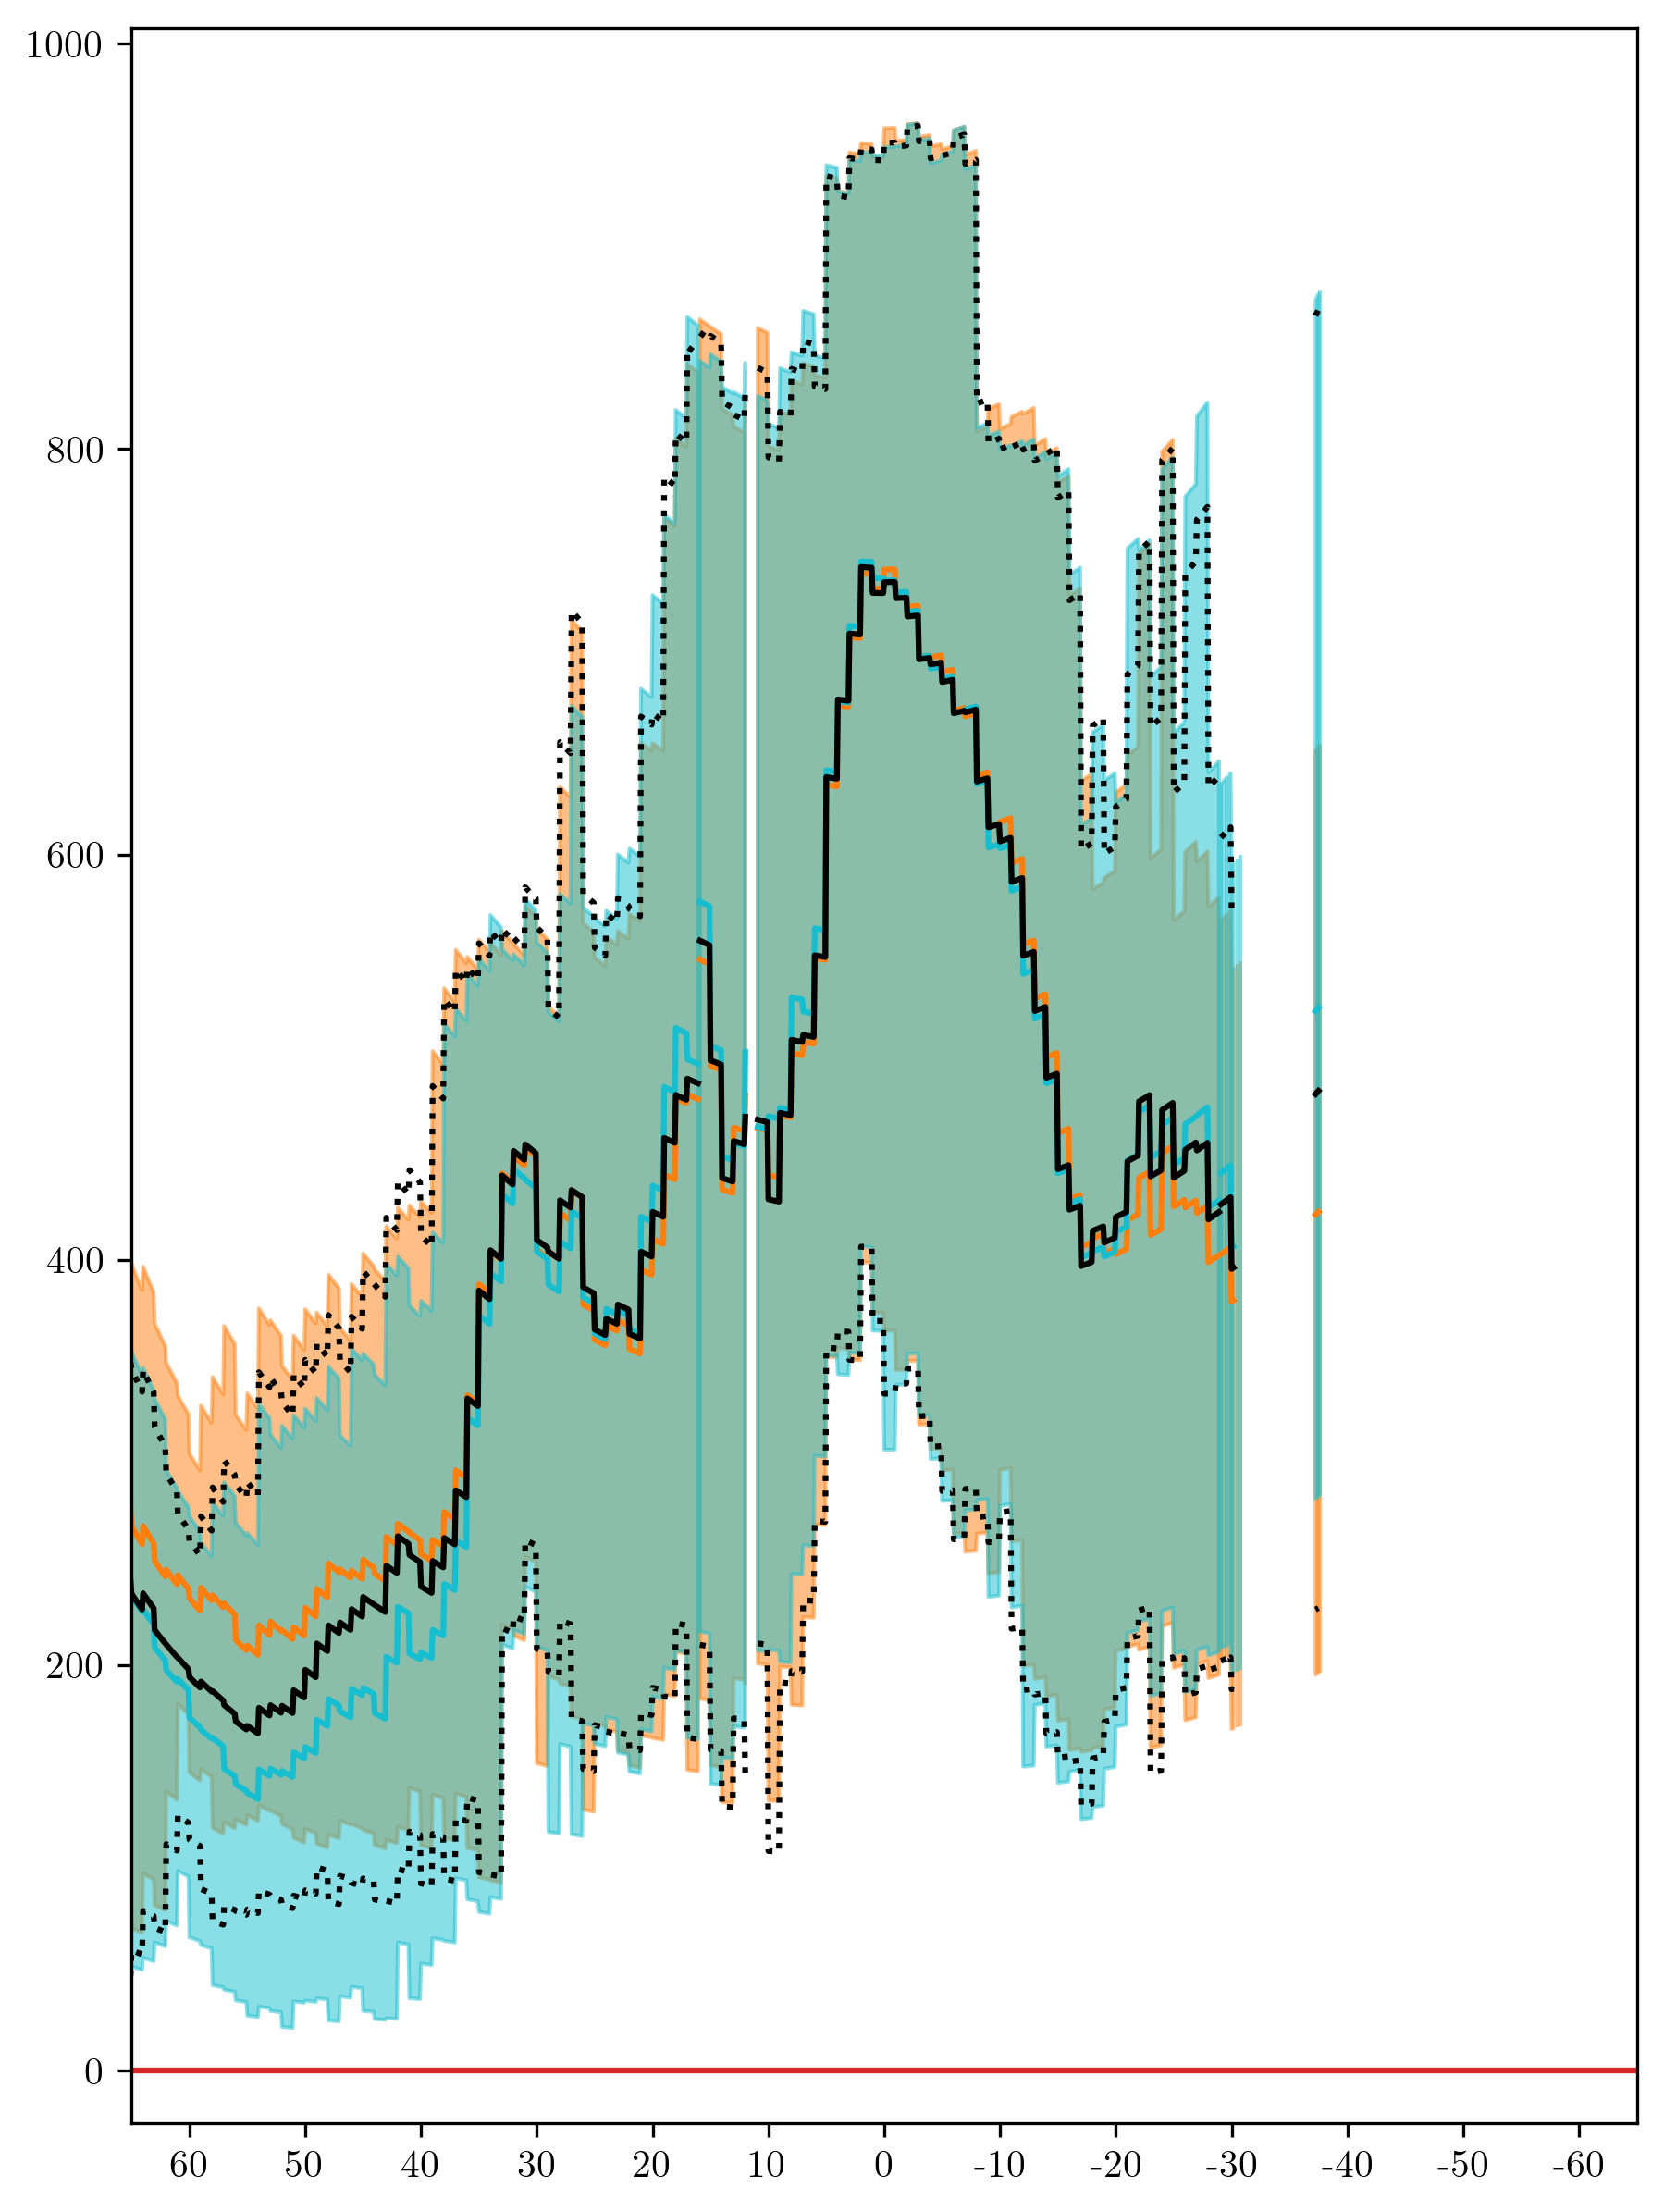

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl






def per_lat(local_value):
    nlat_full = np.shape(local_value)[0]
    bin_ext = 1*12 #12=1°
    bin_n=np.int16(nlat_full/bin_ext)
    x = np.arange(-nlat_full/2,nlat_full/2,1)


    lat_mean=np.arange(0,nlat_full,1,dtype='float32')
    lat_upper_p=np.arange(0,nlat_full,1,dtype='float32')
    lat_lower_p=np.arange(0,nlat_full,1,dtype='float32')
    lat_max=np.arange(0,nlat_full,1,dtype='float32')
    lat_min=np.arange(0,nlat_full,1,dtype='float32')

    for i in range(0,bin_n,1):
        lat_mean[i*bin_ext:i*bin_ext+bin_ext]=np.nanmean(local_value[i*bin_ext:i*bin_ext+bin_ext,:])
        lat_upper_p[i*bin_ext:i*bin_ext+bin_ext]=np.nanpercentile(local_value[i*bin_ext:i*bin_ext+bin_ext,:],95)
        lat_lower_p[i*bin_ext:i*bin_ext+bin_ext]=np.nanpercentile(local_value[i*bin_ext:i*bin_ext+bin_ext,:],5)
        lat_max[i*bin_ext:i*bin_ext+bin_ext]=np.nanmax(local_value[i*bin_ext:i*bin_ext+bin_ext,:])
        lat_min[i*bin_ext:i*bin_ext+bin_ext]=np.nanmin(local_value[i*bin_ext:i*bin_ext+bin_ext,:])

    
    return(x,lat_mean,lat_upper_p,lat_lower_p)



lat_count = []
for i in range(0,2160):
    lat_count.append(np.count_nonzero(~np.isnan(fulldT_defor_local[i,:])))
lat_count_arr = np.asarray(lat_count)
lat_count_arr=(lat_count_arr>60)


#let Latex render the text
nice_fonts = {
        # Use LaTex to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

mpl.rcParams.update(nice_fonts)


fig = plt.figure(figsize=(7,10),dpi=300)
ax = plt.gca()

x,middle, upper, lower = per_lat(np.nanmean([refor_JJA,defor_JJA],axis=0))
middle[lat_count_arr==False]=np.nan
upper[lat_count_arr==False]=np.nan
lower[lat_count_arr==False]=np.nan

p1 = ax.plot(x,middle/lat_area,linestyle='-',color='tab:orange')
p1 = ax.fill_between(x,lower/lat_area,upper/lat_area,alpha=0.5,color='tab:orange')


x,middle, upper, lower = per_lat(np.nanmean([refor_DJF,defor_DJF],axis=0))
middle[lat_count_arr==False]=np.nan
upper[lat_count_arr==False]=np.nan
lower[lat_count_arr==False]=np.nan

p2 = ax.plot(x,middle/lat_area,linestyle='-',color='tab:cyan')
p1 = ax.fill_between(x,lower/lat_area,upper/lat_area,alpha=0.5,color='tab:cyan')




x,middle, upper, lower = per_lat(np.nanmean([fulldT_refor_local,fulldT_defor_local],axis=0))
middle[lat_count_arr==False]=np.nan
upper[lat_count_arr==False]=np.nan
lower[lat_count_arr==False]=np.nan
p4 = ax.plot(x,middle/lat_area,linestyle='-',color='k')
p4 = ax.plot(x,upper/lat_area,linestyle=':',color='k')
p4 = ax.plot(x,lower/lat_area,linestyle=':',color='k')





ax.axhline(y=0,color='tab:red')
ax.set_xticks(np.arange(-1080,1081,10*12))
ax.set_xticklabels(np.arange(90,-91,-10))
ax.set_xbound(12*65,-12*65)


plt.show